In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)

print(train_data.train_data.shape)

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.train_labels
print(train_x.shape)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.test_labels[:2000]

torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


/Users/gyl/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/gyl/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/gyl/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/gyl/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [2]:
train_y.shape

torch.Size([60000])

In [3]:
print(train_y[:10])

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


In [4]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [5]:
test_y.shape

torch.Size([2000])

In [6]:
print(test_y[:10])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [7]:
import matplotlib.pyplot as plt

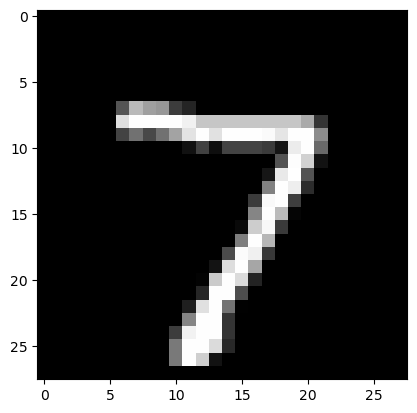

In [8]:
plt.imshow(test_x[0,0,:,:].numpy(), 'gray')

In [9]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [10]:
loss_func = nn.CrossEntropyLoss()

In [11]:
aa = torch.randn(32, 10)
bb = test_y[:32]
cc = loss_func(aa,bb)
print(cc)

tensor(2.5655)


In [12]:
import torch.nn.functional as F

In [13]:
target = torch.tensor([0,7,9]) # 标签 这里还有一个torch.tensor与torch.Tensor的知识点https://blog.csdn.net/weixin_40607008/article/details/107348254
one_hot = F.one_hot(target).float() 
print(one_hot)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])


In [14]:
target = torch.randn(3, 5).softmax(dim=1)
print(target)

tensor([[0.3700, 0.0527, 0.0904, 0.1832, 0.3038],
        [0.0347, 0.1287, 0.1598, 0.0687, 0.6082],
        [0.0908, 0.4053, 0.0590, 0.3907, 0.0542]])


In [15]:
target = torch.randn(3, 5)
print(target)

tensor([[ 0.3831,  0.3972, -0.3194,  0.3713,  1.0335],
        [ 0.6378,  1.0664, -0.4045, -1.2725,  1.1779],
        [ 0.2202, -0.0091, -0.5421, -1.1051,  0.3281]])


In [16]:
print(target.softmax(dim=1))

tensor([[0.1847, 0.1873, 0.0915, 0.1825, 0.3540],
        [0.2104, 0.3231, 0.0742, 0.0312, 0.3611],
        [0.2746, 0.2184, 0.1281, 0.0730, 0.3059]])


In [17]:
print(target.softmax(dim=0))

tensor([[0.3185, 0.2763, 0.3678, 0.7034, 0.3775],
        [0.4109, 0.5396, 0.3378, 0.1359, 0.4361],
        [0.2706, 0.1841, 0.2944, 0.1607, 0.1864]])


In [18]:
import pdb

In [19]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
#         self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
#         x = F.relu(x)
#         x = self.fc3(x)

        output = x
        return output


fc = FC()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3017 | test accuracy: 0.199
Epoch:  0 | train loss: 0.3840 | test accuracy: 0.834
Epoch:  0 | train loss: 0.4284 | test accuracy: 0.858
Epoch:  0 | train loss: 0.4404 | test accuracy: 0.874
Epoch:  0 | train loss: 0.2592 | test accuracy: 0.882
Epoch:  0 | train loss: 0.1574 | test accuracy: 0.887
Epoch:  0 | train loss: 0.4323 | test accuracy: 0.895
Epoch:  0 | train loss: 0.1539 | test accuracy: 0.898
Epoch:  1 | train loss: 0.3229 | test accuracy: 0.905
Epoch:  1 | train loss: 0.1373 | test accuracy: 0.903
Epoch:  1 | train loss: 0.2222 | test accuracy: 0.914
Epoch:  1 | train loss: 0.2289 | test accuracy: 0.916
Epoch:  1 | train loss: 0.1447 | test accuracy: 0.914
Epoch:  1 | train loss: 0.3222 | test accuracy: 0.920
Epoch:  1 | train loss: 0.1291 | test accuracy: 0.925
Epoch:  1 | train loss: 0.1438 | test accuracy: 0.925
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [20]:
class FC_ch(nn.Module):
    def __init__(self):
        super(FC_ch, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.dropout = nn.Dropout(0.5)
        self.conv = nn.Conv1d(512, 256, kernel_size=5, stride=1, padding=2)
        self.fc2 = nn.Linear(256, 10)
#         self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = x.unsqueeze(-1)
        x = F.relu(self.conv(x))
        x = x.squeeze(-1)
        x = self.fc2(x)

        output = x
        return output


fc = FC_ch()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3069 | test accuracy: 0.207
Epoch:  0 | train loss: 0.4631 | test accuracy: 0.818
Epoch:  0 | train loss: 0.6844 | test accuracy: 0.876
Epoch:  0 | train loss: 0.4737 | test accuracy: 0.882
Epoch:  0 | train loss: 0.3085 | test accuracy: 0.898
Epoch:  0 | train loss: 0.1782 | test accuracy: 0.908
Epoch:  0 | train loss: 0.1765 | test accuracy: 0.908
Epoch:  0 | train loss: 0.3366 | test accuracy: 0.923
Epoch:  1 | train loss: 0.0547 | test accuracy: 0.922
Epoch:  1 | train loss: 0.1700 | test accuracy: 0.919
Epoch:  1 | train loss: 0.0674 | test accuracy: 0.928
Epoch:  1 | train loss: 0.1809 | test accuracy: 0.931
Epoch:  1 | train loss: 0.1502 | test accuracy: 0.942
Epoch:  1 | train loss: 0.0669 | test accuracy: 0.932
Epoch:  1 | train loss: 0.0463 | test accuracy: 0.945
Epoch:  1 | train loss: 0.0858 | test accuracy: 0.942
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [21]:
class FC_ch(nn.Module):
    def __init__(self):
        super(FC_ch, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.dropout = nn.Dropout(0.5)
        self.conv = nn.Conv1d(512, 256, kernel_size=5, stride=1, padding=2)
        self.fc2 = nn.Linear(256, 10)
#         self.fc3 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = x.unsqueeze(-1)
        x = F.relu(self.conv(x))
        x = x.squeeze(-1)
        x = self.dropout(x)
        x = self.fc2(x)

        output = x
        return output


fc = FC_ch()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.2936 | test accuracy: 0.146
Epoch:  0 | train loss: 0.6471 | test accuracy: 0.775
Epoch:  0 | train loss: 0.3816 | test accuracy: 0.849
Epoch:  0 | train loss: 0.2890 | test accuracy: 0.864
Epoch:  0 | train loss: 0.1633 | test accuracy: 0.885
Epoch:  0 | train loss: 0.1905 | test accuracy: 0.883
Epoch:  0 | train loss: 0.2865 | test accuracy: 0.902
Epoch:  0 | train loss: 0.1421 | test accuracy: 0.922
Epoch:  1 | train loss: 0.1407 | test accuracy: 0.911
Epoch:  1 | train loss: 0.2487 | test accuracy: 0.909
Epoch:  1 | train loss: 0.0749 | test accuracy: 0.921
Epoch:  1 | train loss: 0.2111 | test accuracy: 0.927
Epoch:  1 | train loss: 0.2710 | test accuracy: 0.920
Epoch:  1 | train loss: 0.2366 | test accuracy: 0.933
Epoch:  1 | train loss: 0.1679 | test accuracy: 0.933
Epoch:  1 | train loss: 0.1959 | test accuracy: 0.936
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [22]:
class FC_ch(nn.Module):
    def __init__(self):
        super(FC_ch, self).__init__()
#         self.dropout = nn.Dropout(0.5)
        self.conv1 = nn.Conv1d(784, 512, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(512, 256, kernel_size=5, stride=1, padding=2)
        self.fc = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)

    
        output = x
        return output
    
fc = FC_ch()

optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
# loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 20000
batch_size = 50

for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 2.3080 | test accuracy: 0.199
Epoch:  0 | train loss: 0.2867 | test accuracy: 0.809
Epoch:  0 | train loss: 0.3241 | test accuracy: 0.837
Epoch:  0 | train loss: 0.3691 | test accuracy: 0.859
Epoch:  0 | train loss: 0.1927 | test accuracy: 0.892
Epoch:  0 | train loss: 0.1264 | test accuracy: 0.896
Epoch:  0 | train loss: 0.1757 | test accuracy: 0.910
Epoch:  0 | train loss: 0.2547 | test accuracy: 0.914
Epoch:  1 | train loss: 0.1143 | test accuracy: 0.918
Epoch:  1 | train loss: 0.1122 | test accuracy: 0.922
Epoch:  1 | train loss: 0.1395 | test accuracy: 0.923
Epoch:  1 | train loss: 0.0361 | test accuracy: 0.933
Epoch:  1 | train loss: 0.5188 | test accuracy: 0.936
Epoch:  1 | train loss: 0.2446 | test accuracy: 0.930
Epoch:  1 | train loss: 0.0987 | test accuracy: 0.937
Epoch:  1 | train loss: 0.2388 | test accuracy: 0.946
tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [23]:
EPOCH = 3
LR = 0.0005
for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
#         pdb.set_trace()

        output = fc(b_x)
    
        loss = loss_func(output, b_y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

Epoch:  0 | train loss: 0.0442 | test accuracy: 0.943
Epoch:  0 | train loss: 0.0276 | test accuracy: 0.943
Epoch:  0 | train loss: 0.0674 | test accuracy: 0.952
Epoch:  0 | train loss: 0.0514 | test accuracy: 0.955
Epoch:  0 | train loss: 0.1107 | test accuracy: 0.946
Epoch:  0 | train loss: 0.0821 | test accuracy: 0.955
Epoch:  0 | train loss: 0.1476 | test accuracy: 0.952
Epoch:  0 | train loss: 0.0435 | test accuracy: 0.953
Epoch:  1 | train loss: 0.1348 | test accuracy: 0.946
Epoch:  1 | train loss: 0.1592 | test accuracy: 0.952
Epoch:  1 | train loss: 0.1801 | test accuracy: 0.957
Epoch:  1 | train loss: 0.0111 | test accuracy: 0.953
Epoch:  1 | train loss: 0.0644 | test accuracy: 0.952
Epoch:  1 | train loss: 0.0433 | test accuracy: 0.953
Epoch:  1 | train loss: 0.0717 | test accuracy: 0.960
Epoch:  1 | train loss: 0.0620 | test accuracy: 0.956
Epoch:  2 | train loss: 0.0305 | test accuracy: 0.961
Epoch:  2 | train loss: 0.0777 | test accuracy: 0.965
Epoch:  2 | train loss: 0.03

In [24]:
test_output = fc(test_x[:9])

In [25]:
test_output.shape

torch.Size([9, 10])

In [26]:
test_output[1,:]

tensor([ -7.2257,   3.0751,  15.5655,   1.2239, -13.8086,  -9.6548,  -5.9159,
         -5.5812,  -0.2586, -16.8929], grad_fn=<SliceBackward>)

In [27]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [28]:
torch.max(test_output, 1)[1].data.squeeze()

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [29]:
 print(torch.sum(torch.max(test_output, 1)[1]==test_y[:9]))

tensor(9)


In [30]:
torch.max(test_output, 1)[1]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [31]:
test_y[:9]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5])

In [32]:
test_output

tensor([[ -4.5071,  -5.9536,   1.8112,   0.7863, -11.4025,  -5.3168, -15.0147,
          13.2134,  -2.0886,  -2.0779],
        [ -7.2257,   3.0751,  15.5655,   1.2239, -13.8086,  -9.6548,  -5.9159,
          -5.5812,  -0.2586, -16.8929],
        [ -6.7062,   8.0000,   0.5417,  -1.9543,  -4.0173,  -3.4562,  -1.6554,
          -0.5594,  -0.1531,  -5.1171],
        [ 11.4543,  -8.6482,   0.8471,  -3.7697,  -7.3575,  -1.7090,  -0.2732,
          -2.3058,  -6.0865,  -2.0508],
        [ -3.7847,  -6.7684,  -5.3555,  -6.0948,  11.7047,  -3.6038,  -4.2472,
          -0.4344,  -4.5312,   3.5151],
        [ -8.8911,  11.3220,  -0.4156,  -2.8214,  -3.4261,  -7.0033,  -5.1783,
           1.6287,  -1.6511,  -4.6905],
        [ -9.3329,  -4.9096,  -8.9195,  -5.7908,  10.5715,  -1.5958,  -6.1786,
          -2.1789,   1.2211,   1.9752],
        [ -6.2260,  -5.3597,  -4.9796,   1.1270,   2.0992,  -4.6781, -10.7574,
          -1.4191,  -2.1942,  10.0918],
        [ -7.1013,  -5.0907,  -3.3721,  -5.2604,

In [33]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [34]:
test_output

tensor([[ -4.5071,  -5.9536,   1.8111,   0.7863, -11.4025,  -5.3168, -15.0147,
          13.2134,  -2.0886,  -2.0779]], grad_fn=<AddmmBackward>)

In [35]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

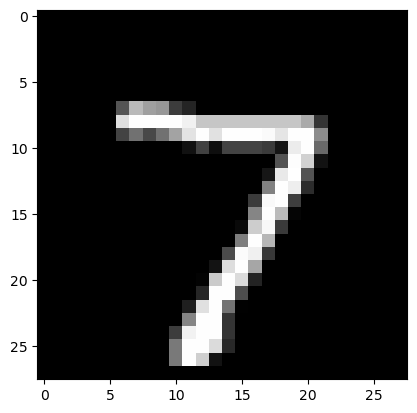

In [36]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')